# Assignment 03
 # Ensemble Learning

 The Loan Dataset of a bank is given
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Perform different Ensemble Learning techniques in the given dataset.

[Dataset](https://drive.google.com/file/d/1xJo16ZdKbmmsqm80TMTaiPYxiN7Uu9OJ/view?usp=sharing)

1. Importing necessary libraries and reading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/train_loan(1).csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

2. Analyzing the target attribute.

In [8]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [9]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

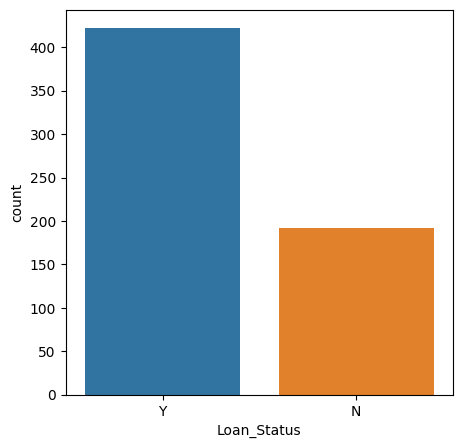

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(data = df,x = 'Loan_Status',hue = 'Loan_Status')

3. Analyzing Loan_ID attribute

In [11]:
df['Loan_ID'].nunique()

614

The Loan_ID attribute has 614 unique entires. This attribute can be removed from the dataset during prediction due to it's insignificance to the prediction.

4. Analyzing 'Gender' attribute

In [12]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

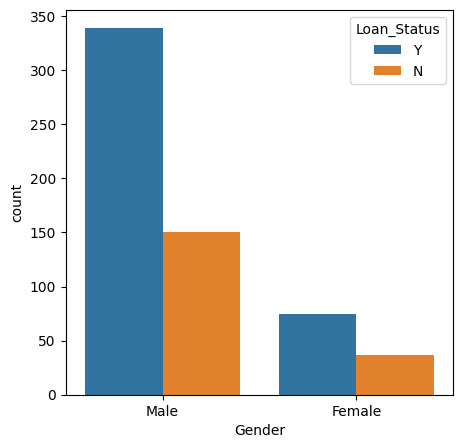

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(data = df,x='Gender',hue='Loan_Status')

In [14]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

The number of 'Male' applicants is significantly higher than the number of 'Female' applicants.

5. Analyzing 'Dependents' attribute.

In [15]:
df['Dependents'].isna().sum()

15

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

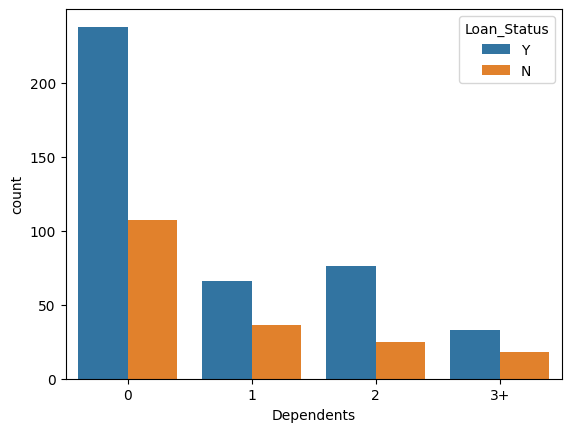

In [18]:
sns.countplot(data=df,x='Dependents',hue='Loan_Status')

In [19]:
df.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

Applicants with no dependents have a higher chance of getting loans approved.

6. Analyzing 'Education' attribute

In [20]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [21]:
df['Education'].isna().sum()

0

<Axes: xlabel='Education', ylabel='count'>

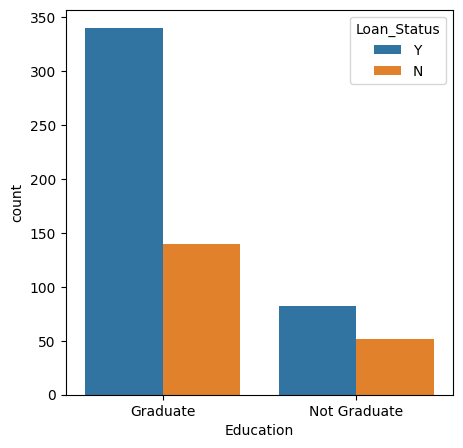

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Education',hue='Loan_Status')

The number of applicants who are Graduates is more compared to the non-graduates. Graduates have a higher chance of getting loans approved.

7. Analyzing 'Self_Employed' attribute

In [23]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
df['Self_Employed'].isna().sum()

32

<Axes: xlabel='Self_Employed', ylabel='count'>

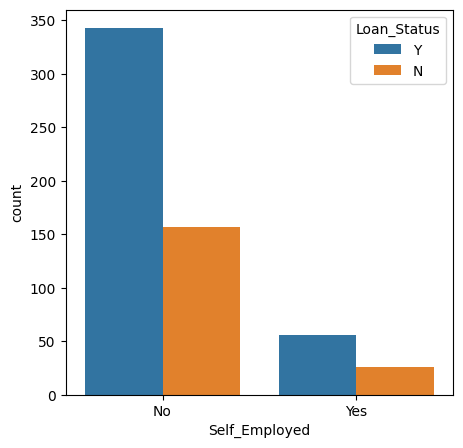

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(df,x='Self_Employed',hue='Loan_Status')

In [26]:
df.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

Applicants who aren't 'Self_Employed' have a higher chance at loan approval.

8. Analyzing 'Property_Area'

In [27]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
df['Property_Area'].isna().sum()

0

<Axes: xlabel='Property_Area', ylabel='count'>

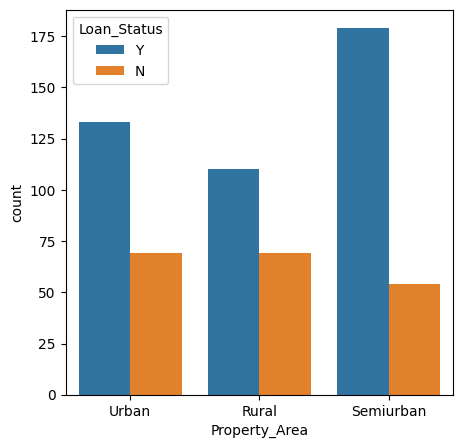

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(df,x='Property_Area',hue='Loan_Status')

In [30]:
df.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64

The countplot shows that the majority of loan applicants reside in the 'Semiurban' area, followed by 'Urban' and 'Rural' areas.

9. Handling missing values in the categorical columns - 'Gender','Married','Dependents','Self_Employed'

In [31]:
cols=['Gender','Married','Dependents','Self_Employed']

for i in cols:
  df[i].fillna(df[i].mode()[0],inplace=True)

10. Analyzing numeric data - ApplicantIncome

In [32]:
df['ApplicantIncome'].nunique()

505

In [33]:
df['ApplicantIncome'].isna().sum()

0

In [34]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

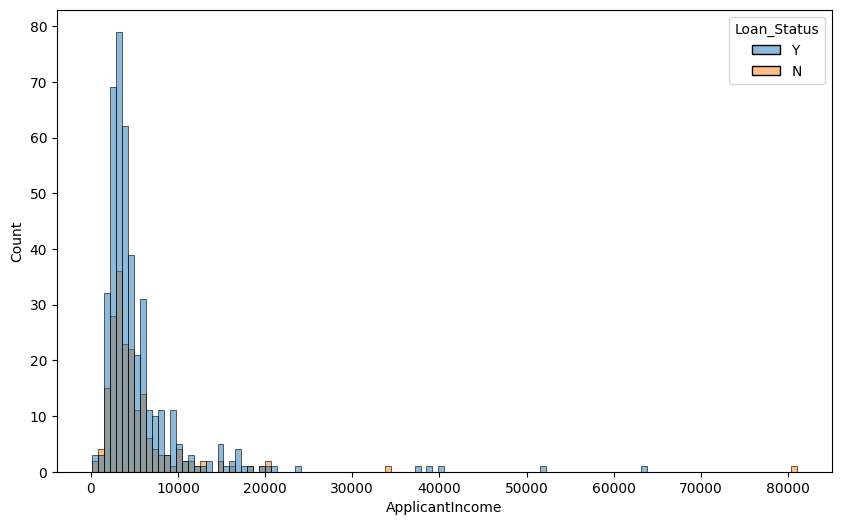

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df,x='ApplicantIncome',hue='Loan_Status')

From the histogram above it can be said that the majority of loan applicants have an ApplicantIncome between 0 and 5000.

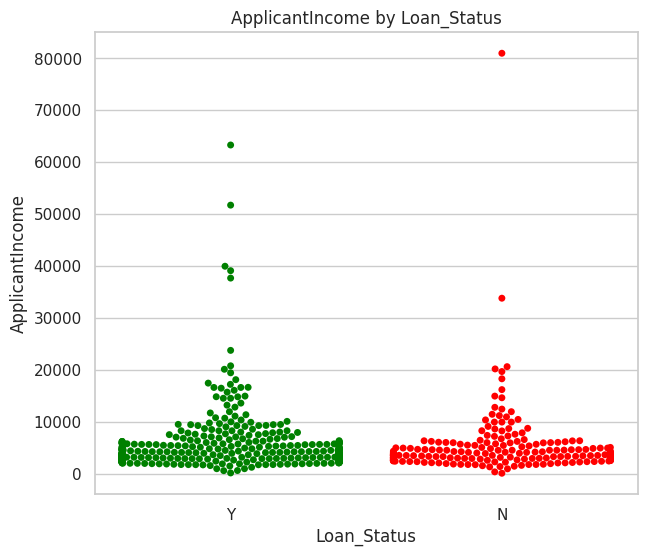

In [36]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

sns.swarmplot(data=df, x='Loan_Status', y='ApplicantIncome', hue='Loan_Status', palette={'Y': 'green', 'N': 'red'})
plt.title('ApplicantIncome by Loan_Status')
plt.show()

From the swarmplot above, it can be concluded that:

There is a higher concentration of loan applicants with lower incomes (below 5000) who have been denied loans compared to those who have been approved. As the ApplicantIncome increases, the number of loan approvals also increases. There are a few outliers with high incomes who have been denied loans.

12. Co-Applicant Income

(0.0, 10000.0)

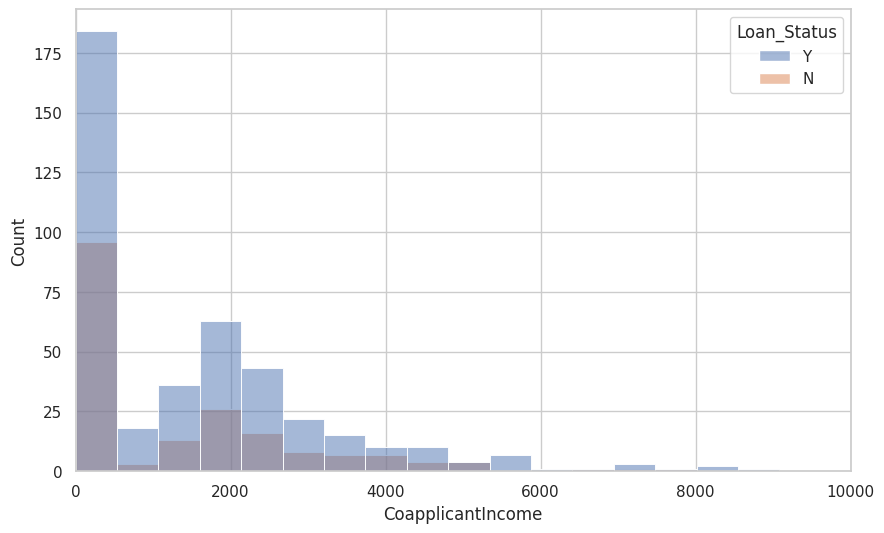

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df,x='CoapplicantIncome',hue='Loan_Status')
plt.xlim(0, 10000)

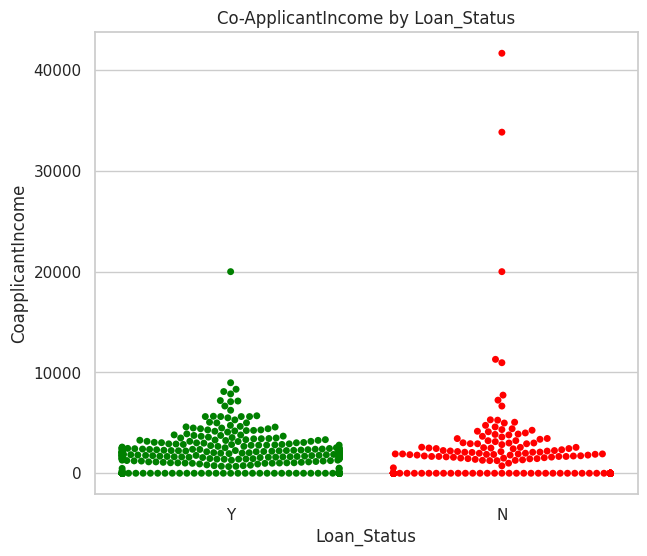

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

sns.swarmplot(data=df, x='Loan_Status', y='CoapplicantIncome', hue='Loan_Status', palette={'Y': 'green', 'N': 'red'})
#plt.ylim(0, 5000)
plt.title('Co-ApplicantIncome by Loan_Status')
plt.show()

The presence of a co-applicant with a higher income seems to increase the chances of loan approval.

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

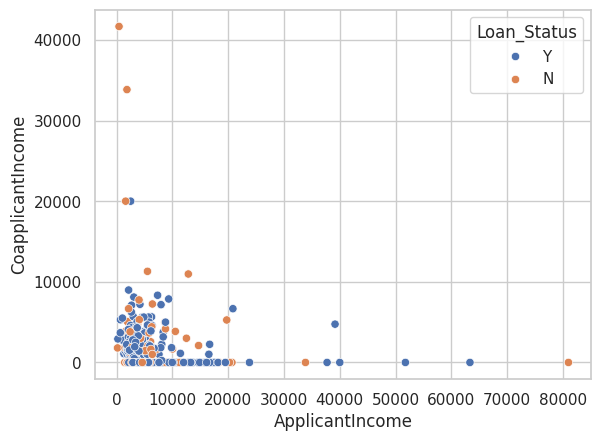

In [39]:
sns.scatterplot(data=df,x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status')

13. LoanAmount

In [40]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [41]:
df['LoanAmount'].isna().sum()

22

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

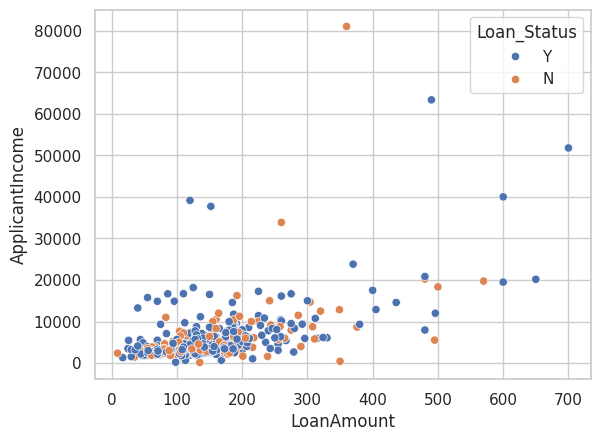

In [42]:
sns.scatterplot(data=df,x='LoanAmount',y='ApplicantIncome',hue='Loan_Status')

Applicants with higher co-applicant incomes are more likely to be approved for loans.

14. Outlier Analysis

<Axes: ylabel='ApplicantIncome'>

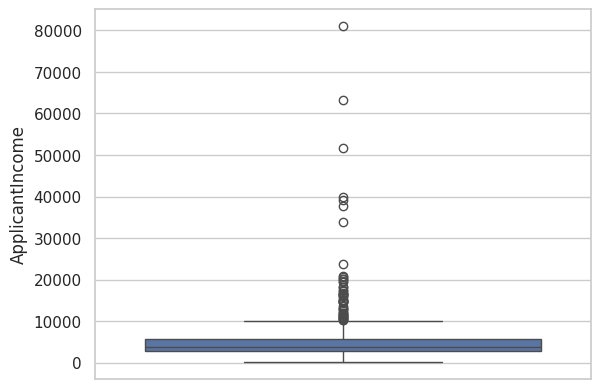

In [43]:
sns.boxplot(df['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

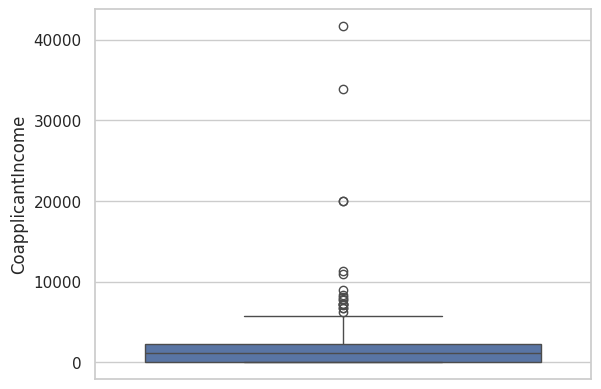

In [44]:
sns.boxplot(df['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

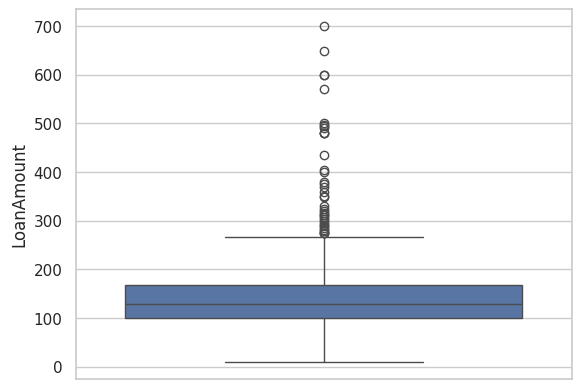

In [45]:
sns.boxplot(df['LoanAmount'])

14. Handling Outliers

In [46]:
def apply_limit_imputer(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    def limit_imputer(value):
        if value > upper_limit:
            return upper_limit
        elif value < lower_limit:
            return lower_limit
        else:
            return value


    df[column_name] = df[column_name].apply(limit_imputer)

In [47]:
apply_limit_imputer(df, 'ApplicantIncome')
apply_limit_imputer(df, 'CoapplicantIncome')
apply_limit_imputer(df, 'LoanAmount')

15. Handling missing values in LoanAmount field.

<Axes: xlabel='LoanAmount', ylabel='Count'>

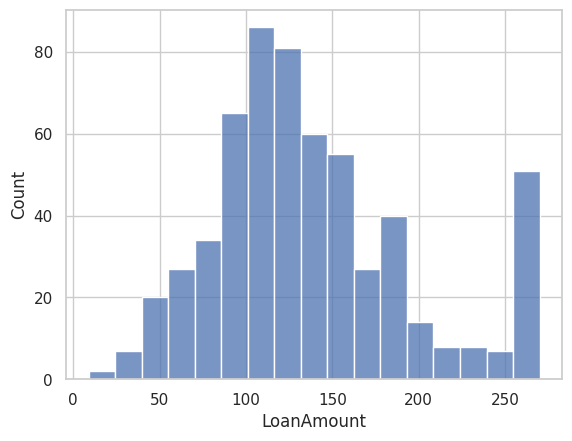

In [48]:
sns.histplot(df['LoanAmount'])

In [49]:
# Handling missing values in 'LoanAmount' after removing outliers

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [50]:
df['Loan_Amount_Term'].isna().sum()

14

In [51]:
df['Credit_History'].isna().sum()

50

15, Handling missing data in 'Loan_Amount_Term' and 'Credit_History'.

In [52]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [53]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

The attributes 'Loan_Amount_Term' and 'Credit_History' takes numerical values but the are categorical in nature.

In [54]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [55]:
df.isna().sum()  # Checking for missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

15. Encoding categorical attributes

In [56]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

for i in cols:
  df[i]=le.fit_transform(df[i])

In [57]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.00,0.000,128.0,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583.00,1508.000,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000.00,0.000,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583.00,2358.000,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000.00,0.000,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,0,1,5417.00,4196.000,267.0,360.0,1.0,2,Y
6,LP001013,1,1,0,1,0,2333.00,1516.000,95.0,360.0,1.0,2,Y
7,LP001014,1,1,3,0,0,3036.00,2504.000,158.0,360.0,0.0,1,N
8,LP001018,1,1,2,0,0,4006.00,1526.000,168.0,360.0,1.0,2,Y
9,LP001020,1,1,1,0,0,10171.25,5743.125,270.0,360.0,1.0,1,N


16. Splitting independent and dependent attributes into x and y.

In [58]:
x=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

17. Scaling numerical data.

In [59]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x=sc.fit_transform(x)

x=pd.DataFrame(x)

x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.497164,-0.874587,-0.174056,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.013767,0.054395,-0.174056,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.652632,-0.874587,-1.261885,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.820924,0.578025,-0.314421,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.558104,-0.874587,0.054037,0.273231,0.411733,1.223298


17. Training Data and Test Data

In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

18. Training the model using Random Forest Classifier (Bagging)

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=42)

clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

19. Prediction

In [62]:
y_pred = clf.predict(x_test)

20. Accuracy score

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7597402597402597

21. Training the model using Ada Boost Classifier (Boosting)

In [64]:
# Boosting

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=10)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

accuracy_score(y_test,y_pred)

0.7727272727272727

22. Accuracy Score Comparison

The accuracy scores suggest that the Ada Boost Classifier performs slightly better on this dataset.